# Sanofi Paul Ricard
This notebook is being used to generate a nice image of cars around the Paul Ricard ciruit.

In [3]:
# import libraries
import plotly.graph_objects as go
import pandas as pd
import fastf1 as ff1
import numpy as np
import set_config

In [4]:
dir_local = set_config.ConfigSectionMap("SectionOne")['local']
dir_sanofi_share = set_config.ConfigSectionMap("SectionOne")['sanofi']
dir_race = set_config.ConfigSectionMap("SectionOne")['race']

print ("dir_sanofi_share is %s" % (dir_sanofi_share))
print ("dir_local is %s" % (dir_local))


dir_sanofi_share is C:/Users/mark_/Sanofi/Sanofi x McLaren sharing - General/Frankfurt sprint/SFD/
dir_local is C:/Users/mark_/Documents/McLaren2021/Sanofi/


In [5]:
filename = 'leaderboard.csv'
path = os.path.join(dir_race, filename)

df = pd.read_csv(path)
df.head()


,Unnamed: 0,Line,2021-04-15 00:00:00,2021-05-13 00:00:00,2021-06-10 00:00:00,2021-07-08 00:00:00,2021-08-19 00:00:00,2021-09-16 00:00:00,2021-10-14 00:00:00,2021-11-18 00:00:00,...,Plant,position,gap_to_leader,prev_position,Gain/Loss,interval,OEE Start point,McL_Start_OEE,OEE% progress,Way to Prog Target (65%)
0,0,SCO - IMA C80/2,88.914275,79.456522,82.482693,64.674113,75.994197,71.738796,89.435187,71.834152,...,SCOPPITO,1,0.000000,1,0,NaN,0.451031,0.443285,0.076851,0.122118
1,1,SCO - GAMMA1,89.157586,79.525767,79.076756,64.979194,76.634297,85.330701,85.346793,79.581297,...,SCOPPITO,2,15.102457,2,0,15.102457,0.418683,0.413847,0.100203,0.131113
2,2,MAF - C9 Packaging Line,88.916676,89.747841,90.361488,72.580804,72.783181,74.841302,83.459987,85.792748,...,Maisons-Alfort,3,33.954092,3,0,18.851635,0.419899,0.319749,0.195971,0.034130
3,3,"FRA - Devices Pens, AL6",89.191135,90.323044,87.005598,75.548501,70.465705,81.608276,84.178781,81.577674,...,Frankfurt,4,35.368778,4,0,1.414686,0.381922,NaN,0.049090,0.218989
4,4,MAF - C2 Packaging Line,88.818483,90.459918,90.261138,85.472142,82.528049,67.891493,86.558580,78.003758,...,Maisons-Alfort,5,45.463627,6,1,10.094850,0.399715,0.378347,0.070565,0.179720


In [6]:
cars = df[['Line', '2021-11-18 00:00:00']]

In [7]:
cars.sort_values(cars.columns[1], inplace=True)
cars['lap_position'] = np.arange(1,len(cars) + 1)
cars

C:\Users\mark_\anaconda3\envs\race_dash\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
<ipython-input-7-13bd7565c8f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['lap_position'] = np.arange(1,len(cars) + 1)


,Line,2021-11-18 00:00:00,lap_position
11,LLB - IMA-2 Packaging (SOLD),71.178956,1
0,SCO - IMA C80/2,71.834152,2
12,LLB - Bosch-2 Packaging (SOLD),74.840780,3
6,SUZ - LINE 01 - UHLMANN 1880,77.043872,4
8,SUZ - MEDISEAL PURAN,77.833433,5
4,MAF - C2 Packaging Line,78.003758,6
1,SCO - GAMMA1,79.581297,7
3,"FRA - Devices Pens, AL6",81.577674,8
13,LTR - C5 Packaging Line,84.270892,9
2,MAF - C9 Packaging Line,85.792748,10


In [46]:
# ff1.Cache.enable_cache('f1_cache')
GrandPrix = 'Brazil'
ff1.Cache.enable_cache('C:/Users/mark_/Documents/McLaren2021/Sanofi/f1_cache')
laps = ff1.get_session(2019, GrandPrix, 'Q').load_laps(with_telemetry=True)
tel = laps.pick_driver('NOR').pick_fastest().telemetry

core           INFO 	Loading laps for Brazilian Grand Prix - Qualifying [v2.1.7]
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetching track status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for car_data. Loading data...
api            INFO 	Fetchin

In [47]:
import matplotlib.pyplot as plt

In [48]:
plt.style.use('dark_background')

In [49]:
for i, row in cars.iterrows():
    print (row[2], row[0])

1 LLB - IMA-2 Packaging (SOLD)
2 SCO - IMA C80/2
3 LLB - Bosch-2 Packaging (SOLD)
4 SUZ - LINE 01 - UHLMANN 1880
5 SUZ - MEDISEAL PURAN
6 MAF - C2 Packaging Line
7 SCO - GAMMA1
8 FRA - Devices Pens, AL6
9 LTR - C5 Packaging Line
10 MAF - C9 Packaging Line
11 FRA - Devices Pens, AL5 Packaging 1
12 FRA - FF NLP, M22 Filling
13 FRA - FF NLP, M21 Filling
14 FRA - FF NLP, M18 Filling
15 LSX - SUPPO Packaging Line
16 LSX - TR200 Packaging Line
17 WAT - AIL2 ASSEMBLY


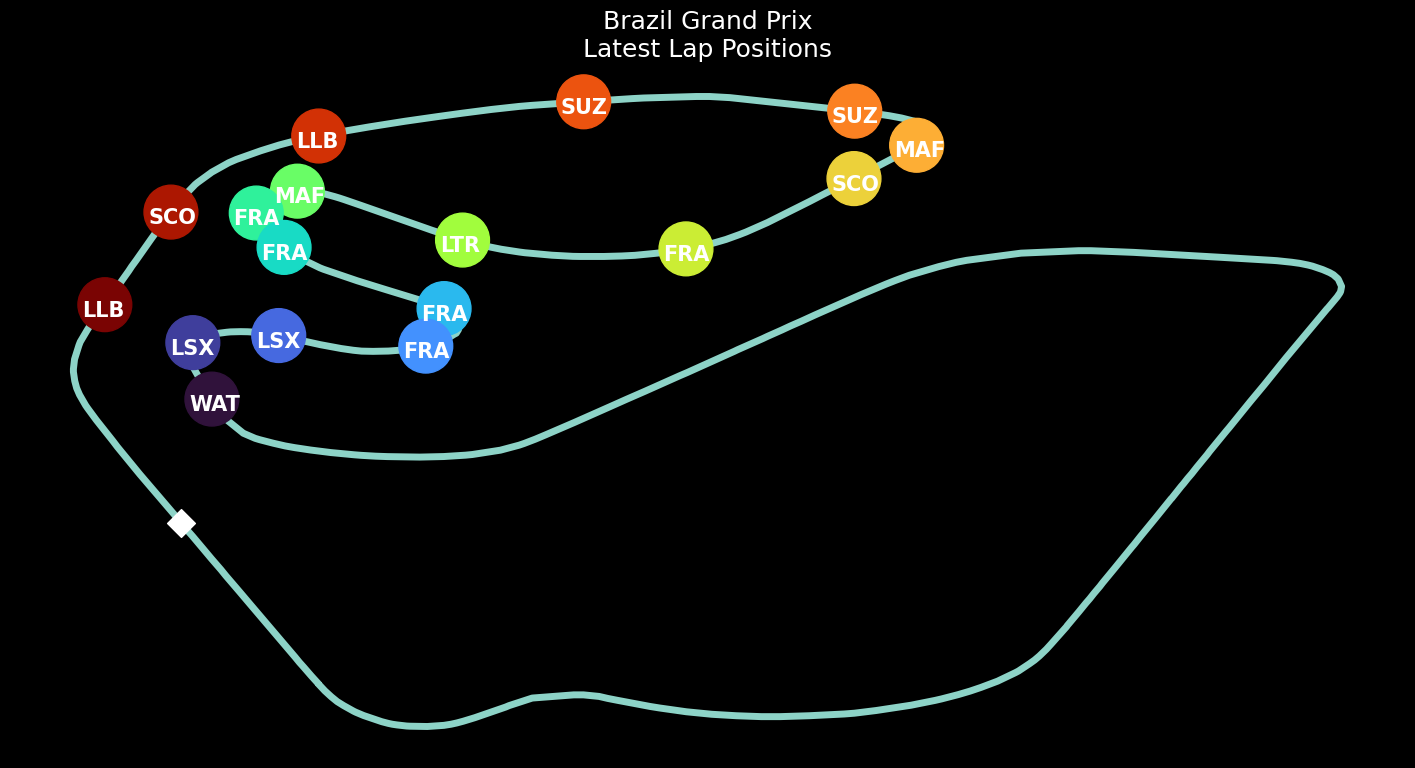

In [53]:
plt.figure(figsize=(18,9))
plt.plot(tel.X, tel.Y, zorder=1, lw=5)


result_x=[]
result_y=[]

t = np.linspace(1,15,len(cars))

# im = plt.imread(dir + 'chequeredFlag.png')
# plt.imshow(im,zorder=1)  

# spaces the cars out around the track
multiplier=-15
# more micro adjustment of car positioning
offset_for_cars=1

# show where the start / finish line is
start_x=[]
start_y=[]
start_x.__iadd__([tel.X.iloc[int(1)]])
start_y.__iadd__([tel.Y.iloc[int(1)]])


for i, row in cars.iterrows():
    # result_x.__iadd__([tel.X.iloc[int(-15*(row[1]+1))]])
    # result_y.__iadd__([tel.Y.iloc[int(-15*(row[1]+1))]])
    result_x.__iadd__([tel.X.iloc[int(multiplier*(row[2]+1))-offset_for_cars]])
    result_y.__iadd__([tel.Y.iloc[int(multiplier*(row[2]+1))-offset_for_cars]])

plt.scatter(result_x, result_y, s=1500, c=t, cmap='turbo_r', zorder=2)

font = {'weight' : 'bold',
        'size'   : 15}

plt.rc('font', **font)

for i, row in cars.iterrows():
    # plt.text(tel.X.iloc[int(-15*(row[1]+1))]-250, tel.Y.iloc[int(-15*(row[1]+1))]-200, row[0][:3], c='white')
    plt.text(tel.X.iloc[int(multiplier*(row[2]+1))-offset_for_cars]-120, tel.Y.iloc[int(multiplier*(row[2]+1))-offset_for_cars]-200, row[0][:3], c='white')

plt.scatter(start_x, start_y, marker = 'D', c='white', zorder=2, s=200)
    
# grid(color='r', linestyle='-', linewidth=2)
# plt.scatter(300, -1930, marker = 's', c='white', zorder=2)
# plt.scatter(600, -1930, marker = 's', c='white', zorder=2)
# plt.scatter(460, -2130, marker = 's', c='white', zorder=2)
# plt.scatter(300, -2130, marker = 's', c='black', zorder=2)  
# plt.scatter(460, -1930, marker = 's', c='black', zorder=2)  
# plt.scatter(600, -2130, marker = 's', c='black', zorder=2)  
    
# for i, row in cars.iterrows():
#     plt.scatter(tel.X.iloc[int(-15*(row[1]+1))], tel.Y.iloc[int(-15*(row[1]+1))], s = 1000, c=t, cmap='Oranges', zorder=2)
#     plt.text(tel.X.iloc[int(-15*(row[1]+1))]-200, tel.Y.iloc[int(-15*(row[1]+1))], row[0][:3], c='white')

plt.title('{} Grand Prix\nLatest Lap Positions'.format(GrandPrix))
plt.axis('off')
plt.show()

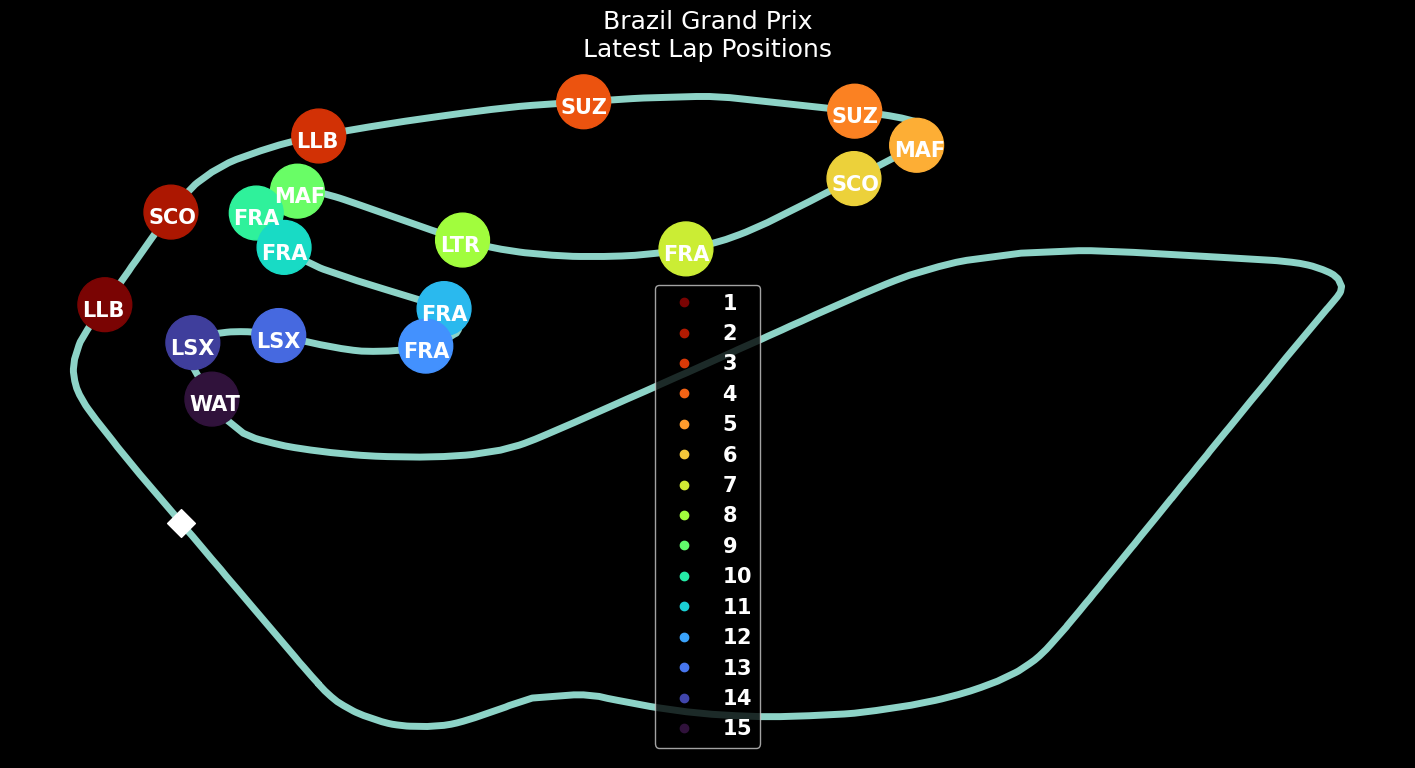

In [66]:
fig, ax = plt.subplots(figsize=(18,9))

plt.plot(tel.X, tel.Y, zorder=1, lw=5)


result_x=[]
result_y=[]

t = np.linspace(1,15,len(cars))

# im = plt.imread(dir + 'chequeredFlag.png')
# plt.imshow(im,zorder=1)  

# spaces the cars out around the track
multiplier=-15
# more micro adjustment of car positioning
offset_for_cars=1

# show where the start / finish line is
start_x=[]
start_y=[]
start_x.__iadd__([tel.X.iloc[int(1)]])
start_y.__iadd__([tel.Y.iloc[int(1)]])


for i, row in cars.iterrows():
    # result_x.__iadd__([tel.X.iloc[int(-15*(row[1]+1))]])
    # result_y.__iadd__([tel.Y.iloc[int(-15*(row[1]+1))]])
    result_x.__iadd__([tel.X.iloc[int(multiplier*(row[2]+1))-offset_for_cars]])
    result_y.__iadd__([tel.Y.iloc[int(multiplier*(row[2]+1))-offset_for_cars]])
    ax.legend(*scatter.legend_elements())

ax.scatter(result_x, result_y, s=1500, c=t, cmap='turbo_r', zorder=2)

font = {'weight' : 'bold',
        'size'   : 15}

plt.rc('font', **font)

for i, row in cars.iterrows():
    # plt.text(tel.X.iloc[int(-15*(row[1]+1))]-250, tel.Y.iloc[int(-15*(row[1]+1))]-200, row[0][:3], c='white')
    plt.text(tel.X.iloc[int(multiplier*(row[2]+1))-offset_for_cars]-120, tel.Y.iloc[int(multiplier*(row[2]+1))-offset_for_cars]-200, row[0][:3], c='white')
    handles, labels = scatter.legend_elements()
    ax.legend(handles, .legend_elements())

# this adds the start/finish marker
ax.scatter(start_x, start_y, marker = 'D', c='white', zorder=2, s=200)
    

plt.title('{} Grand Prix\nLatest Lap Positions'.format(GrandPrix))
plt.axis('off')
plt.show()

NameError: name 'df_weekly' is not defined